In [334]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [335]:
df = pd.read_excel("BodyFat.xls")
df.head()

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [336]:
df.shape

(252, 17)

In [337]:
df.corr()["ADIPOSITY"]

IDNO         0.047717
BODYFAT      0.727994
DENSITY     -0.714732
AGE          0.118851
WEIGHT       0.887352
HEIGHT      -0.024891
ADIPOSITY    1.000000
NECK         0.777857
CHEST        0.911799
ABDOMEN      0.923880
HIP          0.883269
THIGH        0.812706
KNEE         0.713660
ANKLE        0.500317
BICEPS       0.746384
FOREARM      0.558594
WRIST        0.625907
Name: ADIPOSITY, dtype: float64

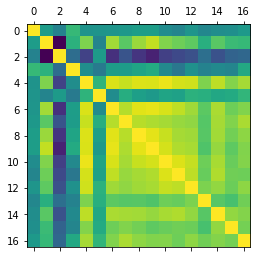

In [338]:
plt.matshow(df.corr())

In [339]:
def plot_corr_with_labels(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (15, 15))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

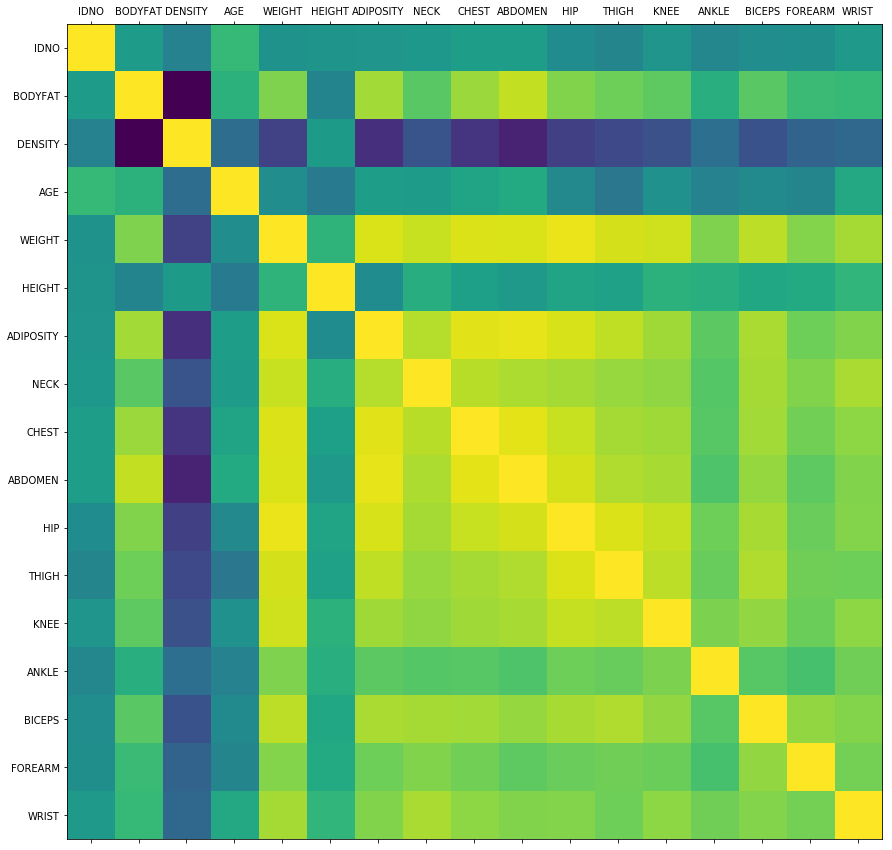

In [340]:
plot_corr_with_labels(df)

Plot the adiposity data against the abdomen data

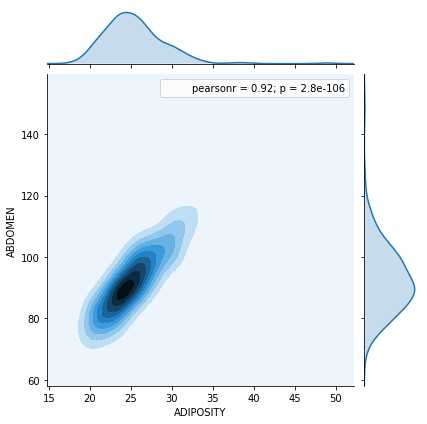

In [341]:
sns.jointplot(x="ADIPOSITY", y="ABDOMEN", data=df, kind="kde");

In [342]:
under_45 = df[ df["AGE"] < 45]
over_45 = df[ df["AGE"] >= 45]

print(under_45.shape)
print(over_45.shape)

(136, 17)
(116, 17)


In [343]:
u45 = under_45.corr()["ADIPOSITY"]
o45 = over_45.corr()["ADIPOSITY"]

print("\nDifference in correlations with Adiposity between under and over 45's\n")

for i in range(df.columns.values.size):
    print (list(df.columns.values)[i],": ", u45[i] - o45[i], sep = "")


Difference in correlations with Adiposity between under and over 45's

IDNO: 0.05891215582800935
BODYFAT: -0.04490096372751273
DENSITY: 0.02861417819300538
AGE: 0.024507558141896868
WEIGHT: 0.0049510416404691115
HEIGHT: 0.03514388196089998
ADIPOSITY: 0.0
NECK: -0.030663409124133456
CHEST: 0.004175860726502445
ABDOMEN: -0.020820580840045233
HIP: -0.010269505864226813
THIGH: 0.03210502074934207
KNEE: 0.10830842534469676
ANKLE: -0.06194043011693734
BICEPS: 0.08871955387814023
FOREARM: -0.014162800579309187
WRIST: 0.036528410574490966


In [344]:
# set up variable to hold the maximum difference between the correlations with adiposity seen so far
maximumDifference = 0

# set up variable to hold the name of the characteristic which has the greatest difference
maxCharacteristic = ""

# set up a variable which will tell us whether the higher correlation is for under or over 45's
differenceDirection = ""

# loop over all columns to find the characteristic with the greatest difference in 
# correlations with adiposity for under and over 45's
for i in range(df.columns.values.size):
    
    # if the difference in the correlations is greater than any seen before, then we set the greatest difference 
    # to be equal to this value and store the name of the characteristic
    if (abs(u45[i] - o45[i]) > maximumDifference):
        maximumDifference = abs(u45[i] - o45[i])
        maxCharacteristic = df.columns.values[i]
        
        # record whether the correlation is greater for the under 45's or over 45's
        if (u45[i] > o45[i]):
            differenceDirection = "under 45"
        else:
            differenceDirection = "over 45"
        




In [345]:
# after all columns have been looped over, print which characteristic has the greatest 
# difference in correlation with adiposity



print("\nThe characteristic with the greatest difference in correlation with adiposity for under and over 45 year olds is ",
      maxCharacteristic, ". This correlation with this characteristic changes by ", 
      maximumDifference, ", and the correlation is higher for individuals who are ", differenceDirection, sep = "")


The characteristic with the greatest difference in correlation with adiposity for under and over 45 year olds is KNEE. This correlation with this characteristic changes by 0.10830842534469676, and the correlation is higher for individuals who are under 45


We can visualise this difference in correlation by plotting the adiposity data against the knee data for under and over 45's. This is seen below.

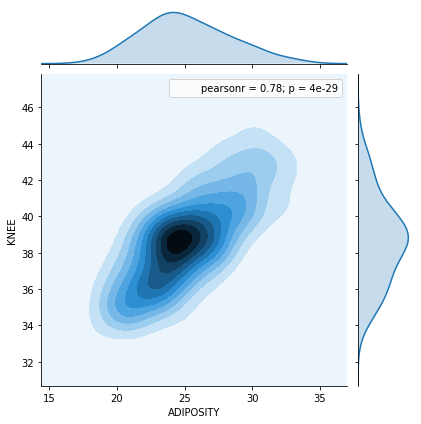

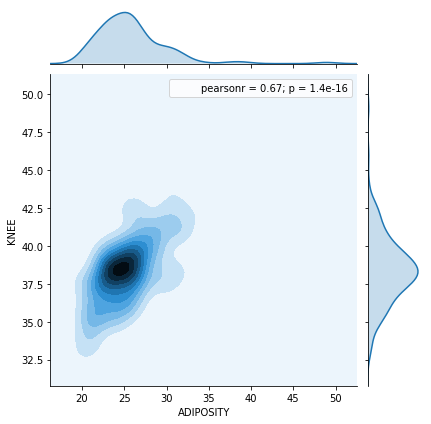

In [346]:
sns.jointplot(x="ADIPOSITY", y=maxCharacteristic, data=under_45, kind="kde");
sns.jointplot(x="ADIPOSITY", y=maxCharacteristic, data=over_45, kind="kde");

# Is this change in correlation statistically significant?

Given the covariances between adiposity, age and knee, is this change in correlation unusually large? Test this by generating dummy data for these three characteristics which obeys the covariance structure, assuming all characteristics are normally distributed (not necessarily an accurate assumption). If we do this multiple times and we rarely (traditionally less than 5% of the time) observe a difference in the correlations for under and over 45's which is as large as in the data, then we may think that this is a statistically significant difference and lends some insight into how the relationship between knee measurement and adiposity changes with age. If we observe a greater difference more often than this, then we may believe that this observation is potentially due to chance, and so may not hold true for other data sets that we could collect.

In [347]:
# Store the mean of each variable and the covariances between the 3 characteristics

m1 = [df.mean()["ADIPOSITY"], df.mean()["KNEE"], df.mean()["AGE"]]

c1 = [[df.cov()["ADIPOSITY"]["ADIPOSITY"], df.cov()["ADIPOSITY"]["KNEE"], df.cov()["ADIPOSITY"]["AGE"]],
      [df.cov()["KNEE"]["ADIPOSITY"], df.cov()["KNEE"]["KNEE"], df.cov()["KNEE"]["AGE"]],
      [df.cov()["AGE"]["ADIPOSITY"], df.cov()["AGE"]["KNEE"], df.cov()["AGE"]["AGE"]]] 

In [348]:
# initialise a variable to store how many times we observe a difference in the 
# correlations larger than the one observed in the data set
biggerDifference = 0
# choose number of times we will repeat this test. The higher this number is, the closer the answer will
# be to the true value
numGenerations = 1000

# construct a for loop to generate our data the chosen number of times
for i in range(numGenerations - 1):
    # construct the required data set from a multivariate normal distribution
    x = pd.DataFrame(np.random.multivariate_normal(m1, c1, df.shape[0]))
    # labe the columns appropriately
    x.columns = ["ADIPOSITY", "KNEE", "AGE"]
    # split into under and over 45
    under_45_gen = x[ x["AGE"] < 45]
    over_45_gen = x[ x["AGE"] >= 45]
    # calculate the correlations between each variable
    u45g = under_45_gen.corr()
    o45g = over_45_gen.corr()
    # if the difference in correlations observed is as big as observed in the data set
    # then add 1 to the counter variable designed to store this
    if (abs(u45g["ADIPOSITY"]["KNEE"] - o45g["ADIPOSITY"]["KNEE"]) > maximumDifference):
        biggerDifference = biggerDifference + 1
        
# output the proportion of times this the difference in correlations exceeds that seen in the data
biggerDifference/numGenerations

0.083

# Not statistically significant
This proportion is generally above 0.08, implying that the observed difference in correlations is not statistically significant (at the 5% level), implying that this may occur simply by chance and hence doesn't shed any light on the impact of age on the link between knee measurement and adiposity.

# What proportion of individuals are in each adiposity class

Split individuals by age and label whether they are classified as underweight, healthy, overweight or obese by adiposity

In [349]:
# add a column called class to the body fat data set
df["CLASS"] = "NA"

# split this data set into different age groups, as the classification of adiposity into weight status, varies by age
men20to39 = df[ (df["AGE"] >= 20) & (df["AGE"] < 40)]
men40to59 = df[ (df["AGE"] >= 40) & (df["AGE"] < 60)]
men60plus = df[ (df["AGE"] >= 60)]



In [350]:
# set up a data set to contain the classification
adiposityClassification = ["Underweight", "Healthy", "Overweight", "Obese"]

# data set with thresholds for different weight classifications by age
adiposityMeasurement20to39 = [8, 21, 26]
adiposityMeasurement40to59 = [11, 23, 29]
adiposityMeasurement60plus = [13, 25, 31]

# loop over the index of each of these data set, classifying each individual by into weight status by adiposity.
# Doing it this way is slow, not sure how to make it quicker at the moment.
pp = men20to39.index
for i in (pp):
    adi = men20to39["ADIPOSITY"][i]
    meas = (adi > adiposityMeasurement20to39).sum()
    men20to39["CLASS"][i] = adiposityClassification[meas]
      

        
pp = men40to59.index
for i in (pp):
    adi = men40to59["ADIPOSITY"][i]
    meas = (adi > adiposityMeasurement40to59).sum()
    men40to59["CLASS"][i] = adiposityClassification[meas]

    

pp = men60plus.index
for i in (pp):
    adi = men60plus["ADIPOSITY"][i]
    meas = (adi > adiposityMeasurement60plus).sum()
    men60plus["CLASS"][i] = adiposityClassification[meas]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A val

In [352]:
men20to39["CLASS"].value_counts()/men20to39.shape[0]

Overweight    0.506667
Obese         0.373333
Healthy       0.120000
Name: CLASS, dtype: float64

In [353]:
men40to59["CLASS"].value_counts()/men40to59.shape[0]

Overweight    0.638298
Healthy       0.241135
Obese         0.120567
Name: CLASS, dtype: float64

In [354]:
men60plus["CLASS"].value_counts()/men60plus.shape[0]

Overweight    0.555556
Healthy       0.361111
Obese         0.083333
Name: CLASS, dtype: float64

There are no individuals who are classed as underweight and fewer healthy individuals according to adiposity in younger age groups